In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [36]:
df = pd.read_csv('/home/davide/Desktop/phd/hawkes/data_090min_training/results_all_not_oracle_090min_BI8.tsv', sep='\t')
df.sort_values(by=['timestamp', 'timestamp_density'], inplace=True)
df.dropna(inplace=True)

In [37]:
df['method_time_prediction'].value_counts()

movingaverage    103
oracle           101
hawkes           100
naive             95
Name: method_time_prediction, dtype: int64

In [38]:
# read json
import json
with open('/home/davide/Desktop/phd/hawkes/data/file_densities_map.json') as f:
    config = json.load(f)

config
df_map = {
    'timestamp': [],
    'timestamp_density': [],
    'density': [],
}

for k, v in config.items():
    num_densities = len(v)
    timestamp = k.split('_')[2].split('.')[0]
    df_map['timestamp'].extend([float(timestamp)] * num_densities)

    for info_density in v:
        pd.Timestamp(info_density[0])
        df_map['timestamp_density'].append(pd.Timestamp(info_density[0]).strftime('%H%M%S'))
        df_map['density'].append(int(info_density[1]))

df_map = pd.DataFrame(df_map)
df_map.sort_values(by=['density'], inplace=True, ascending=False)

best_df = df_map.iloc[0:60]
best_df.head()
best_df['timestamp'] = best_df['timestamp'].apply(lambda x: int(x))
df['timestamp_density'] = df['timestamp_density'].apply(lambda x: '000000' if np.isnan(x) else str(int(x)))
df['timestamp_density'] = df['timestamp_density'].str.pad(6, side='left', fillchar='0')
plot_df = df[df['timestamp'].isin(best_df['timestamp']) & (df['timestamp_density'].isin(best_df['timestamp_density']))]

best_df['timestamp'] = best_df['timestamp'].apply(lambda x: int(x))
#best_df.to_csv('/home/davide/Desktop/phd/hawkes/data/best_densities.csv', index=False)


/tmp/ipykernel_4729/52250657.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_df['timestamp'] = best_df['timestamp'].apply(lambda x: int(x))
/tmp/ipykernel_4729/52250657.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_df['timestamp'] = best_df['timestamp'].apply(lambda x: int(x))


In [23]:
df['timestamp']


0     1.705074e+12
1     1.705074e+12
2     1.705074e+12
3     1.705074e+12
4     1.705077e+12
          ...     
52    1.706094e+12
53    1.706094e+12
54    1.706103e+12
55    1.706110e+12
56    1.706110e+12
Name: timestamp, Length: 505, dtype: float64

In [29]:
plot_df['method_time_prediction'].value_counts()

oracle           57
hawkes           54
movingaverage    54
naive            51
Name: method_time_prediction, dtype: int64

In [28]:
df['timestamp_density'] = df['timestamp_density'].apply(lambda x: '000000' if np.isnan(x) else str(int(x)))
df['timestamp_density'] = df['timestamp_density'].str.pad(6, side='left', fillchar='0')

In [69]:
df['timestamp_density']

0      151951
1      151951
2      151951
3      161544
4      161544
        ...  
205    000000
206    000000
219    000000
220    000000
221    000000
Name: timestamp_density, Length: 336, dtype: object

In [13]:
plot_df[plot_df['method_time_prediction'] == 'oracle'].to_csv('/home/davide/Desktop/phd/hawkes/data_oracle/oracle_results_BI8.csv', index=False)

In [22]:
plot_df

,timestamp,timestamp_density,method_time_prediction,bi_level,accuracy,returns
0,1.705074e+12,151951,hawkes,8,0.558333,21.803475
1,1.705074e+12,151951,movingaverage,8,0.591667,24.333566
2,1.705074e+12,151951,naive,8,0.641667,31.578673
3,1.705074e+12,151951,oracle,8,0.591667,25.023135
4,1.705077e+12,161544,hawkes,8,0.475000,-34.410177
...,...,...,...,...,...,...
439,1.706110e+12,141550,oracle,8,0.633333,11.899703
440,1.706110e+12,150343,hawkes,8,0.258333,-39.664835
441,1.706110e+12,150343,movingaverage,8,0.216667,-42.400184
442,1.706110e+12,150343,naive,8,0.266667,-41.289841


In [30]:
densities_descriptions = plot_df.groupby(['timestamp', 'timestamp_density']).count().reset_index()
densities_descriptions['timestamp'] = densities_descriptions['timestamp'].apply(lambda x: str(x)[:-2])
densities_descriptions[densities_descriptions['method_time_prediction'] < 4]

,timestamp,timestamp_density,method_time_prediction,bi_level,accuracy,returns
7,1705272255894,223115,2,2,2,2
8,1705356920082,212314,3,3,3,3
19,1705486157408,100410,3,3,3,3
20,1705489579996,104953,3,3,3,3
21,1705496790339,123947,3,3,3,3
28,1705789717468,215024,2,2,2,2
34,1705869651281,202209,1,1,1,1
37,1705925395390,102636,3,3,3,3
40,1705960026847,210500,2,2,2,2
55,1706102874539,131727,2,2,2,2


In [45]:
plot_df[plot_df['timestamp_density'] == '102636'] # 211536, 115318

,timestamp,timestamp_density,method_time_prediction,bi_level,accuracy,returns
117,1.705925e+12,102636,hawkes,8,0.500000,-17.024868
119,1.705925e+12,102636,naive,8,0.416667,-15.190990
36,1.705925e+12,102636,oracle,8,0.483333,-12.318664


In [ ]:
plot_df

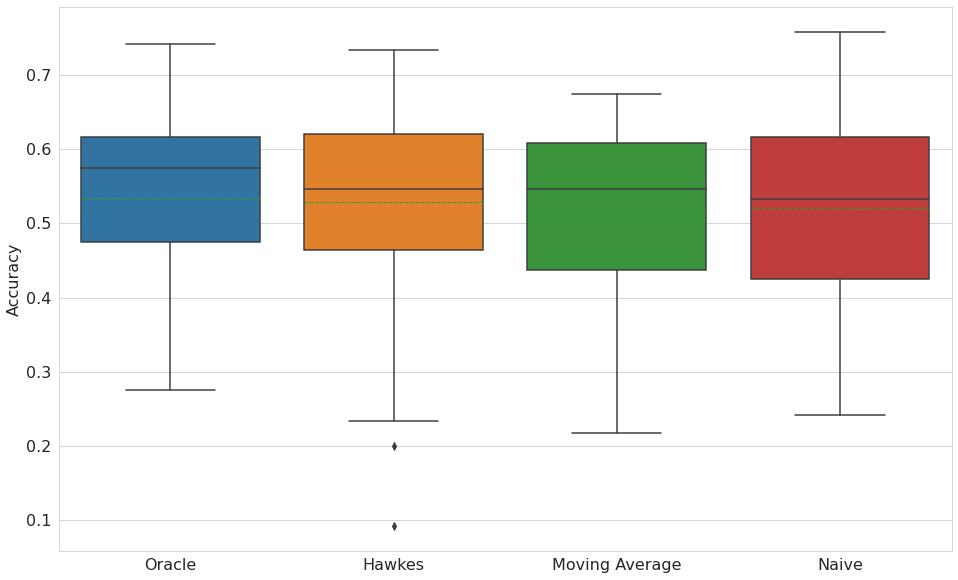

In [39]:
plt.rcParams["figure.figsize"] = (16,10)
order = ['oracle', 'hawkes', 'movingaverage', 'naive']
sns.boxplot(x='method_time_prediction', y='accuracy', data=plot_df, order=order, showmeans=True, meanline=True)
#increase plot size
plt.rcParams.update({'font.size': 16})
# delete x label
plt.xlabel('')
plt.ylabel('Accuracy')
# set x ticks labels
plt.xticks([0, 1, 2, 3], ['Oracle', 'Hawkes', 'Moving Average', 'Naive'])
plt.show()

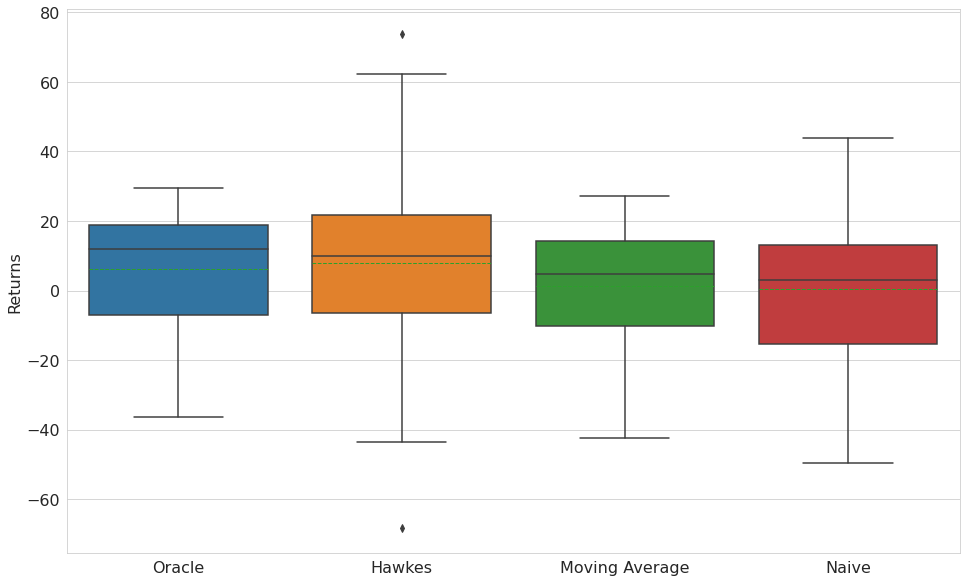

In [40]:
plt.rcParams["figure.figsize"] = (16,10)
order = ['oracle', 'hawkes', 'movingaverage', 'naive']
sns.boxplot(x='method_time_prediction', y='returns', data=plot_df, order=order, showmeans=True, meanline=True)
#increase plot size
plt.rcParams.update({'font.size': 16})
# delete x label
plt.xlabel('')
plt.ylabel('Returns')
# set x ticks labels
plt.xticks([0, 1, 2, 3], ['Oracle', 'Hawkes', 'Moving Average', 'Naive'])
plt.show()

In [4]:
df['method_time_prediction'].value_counts()

hawkes           106
movingaverage    106
naive            106
Name: method_time_prediction, dtype: int64

In [4]:
import json
with open('/home/davide/Desktop/phd/hawkes/data/1705862648312_173406_intensities.json') as f:
    config = json.load(f)

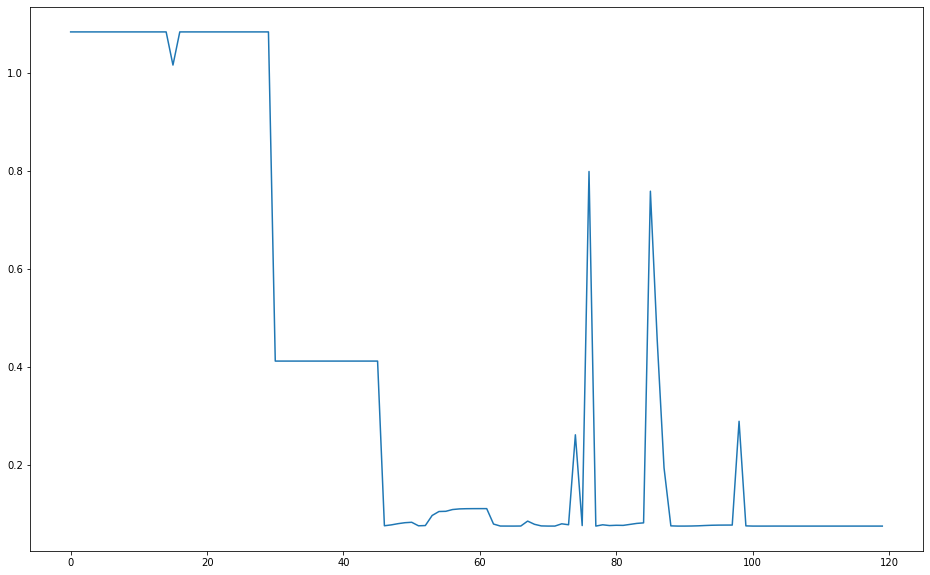

In [5]:
import matplotlib.pyplot as plt

# boxpot of intensities
plt.rcParams["figure.figsize"] = (16,10)
plt.plot(config)

In [41]:
import os

result_file_paths = [
    (i, f"/home/davide/Desktop/phd/hawkes/data_{i}min_training/results_all_not_oracle_{i}min_BI8.tsv") for i in [1, '090',2,5,10,15,20]
]

dfs = []
for i, result_file_path in result_file_paths:
    df = pd.read_csv(result_file_path, sep='\t')
    df['training_minutes'] = i
    df = df[df['method_time_prediction'] == 'hawkes']
    df = df[['training_minutes', 'accuracy']]
    dfs.append(df)

df = pd.concat(dfs)
df.head()

,training_minutes,accuracy
0,1,0.558333
4,1,0.466667
8,1,0.425000
12,1,0.566667
16,1,0.658333


In [16]:
df[df['training_minutes'] == 15]

,training_minutes,accuracy
0,15,0.558333
4,15,0.475000
8,15,0.425000
12,15,0.425000
16,15,0.625000
...,...,...
424,15,0.333333
428,15,0.350000
436,15,0.583333
440,15,0.258333


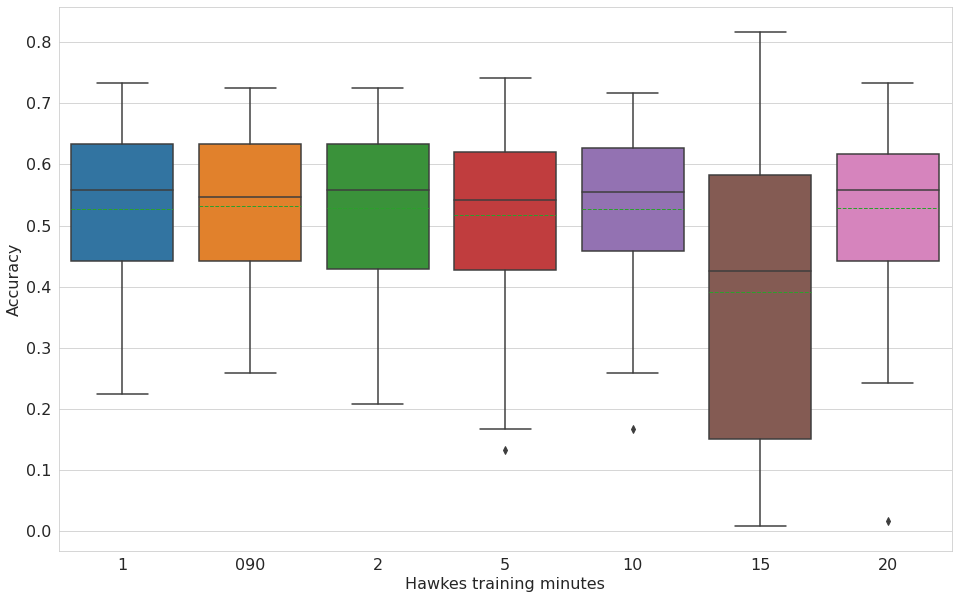

In [54]:
# boxplot
plt.rcParams["figure.figsize"] = (16,10)
sns.boxplot(x='training_minutes', y='accuracy', data=df,showmeans=True, meanline=True)
# increase font size
#increase plot size
plt.xlabel('Hawkes training minutes')
plt.ylabel('Accuracy')
#put white background
sns.set_style("whitegrid")

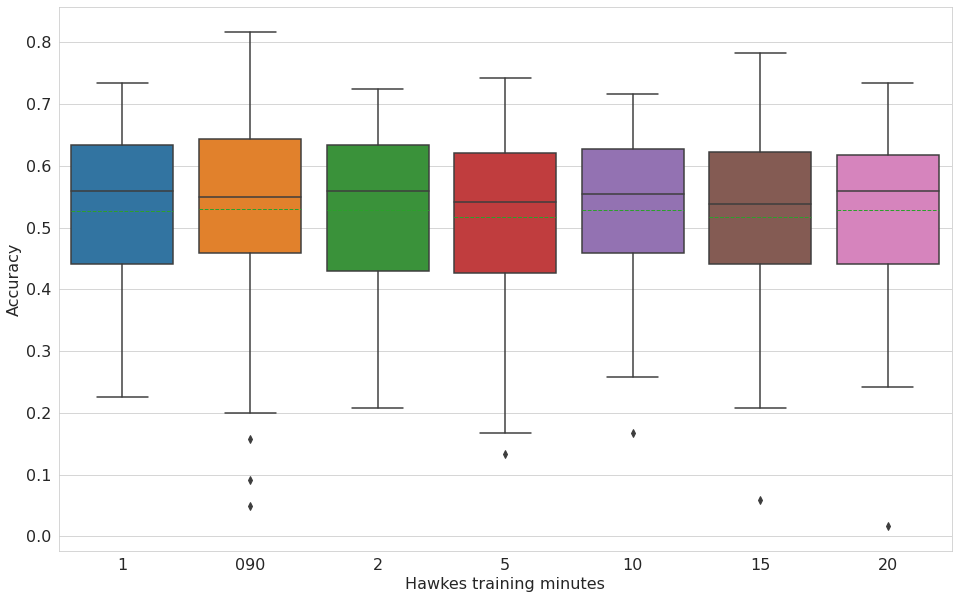

In [42]:
# boxplot
plt.rcParams["figure.figsize"] = (16,10)
sns.boxplot(x='training_minutes', y='accuracy', data=df,showmeans=True, meanline=True)
# increase font size
#increase plot size
plt.xlabel('Hawkes training minutes')
plt.ylabel('Accuracy')
#put white background
sns.set_style("whitegrid")

In [6]:
import numpy as np

events = np.array([1, 2, 3, 4, 5, 15, 25, 30])

In [7]:
def get_logarithmic_distanced_events(events: np.array, offset: int = 0) -> np.array:
    logarithmic_distanced_events = np.zeros(len(events))

    for i in range(1,len(events)):
        logarithmic_distance = np.log10(events[i] - events[i-1]) + offset
        logarithmic_distanced_events[i] = logarithmic_distance + logarithmic_distanced_events[i-1]

    return logarithmic_distanced_events

In [9]:
a = get_logarithmic_distanced_events(events, 4)
a

array([ 0.     ,  4.     ,  8.     , 12.     , 16.     , 21.     ,
       26.     , 30.69897])

In [32]:
def get_reconverted_distanced_events(events: np.array, starting_time: float, offset: int = 0) -> np.array:
    reconverted_events = np.zeros(len(events))
    reconverted_events[0] = starting_time

    for i in range(1,len(events)):
        reconverted_events[i] = 10 ** (events[i] - events[i-1] - offset) + reconverted_events[i-1]

    return reconverted_events

In [35]:
get_reconverted_distanced_events(a, 1, 4)

array([ 1.,  2.,  3.,  4.,  5., 15., 25., 30.])